# Predict Customer Churn
* start date: 20.06.24

> 고객 데이터에 관심이 많다. 특히 고객 이탈에 대해 공부를 해보고 싶었는데, Kaggle에 공개된 데이터셋이 존재했다.

* 목표: 통신사 도메인의 고객 데이터를 활용한 고객 이탈 예측 모델 생성
* 데이터셋: [캐글 데이터셋](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2.1-컬럼명-변경" data-toc-modified-id="2.1-컬럼명-변경-2.1">2.1 컬럼명 변경</a></span></li><li><span><a href="#2.2-이진-텍스트-데이터-숫자로-변경" data-toc-modified-id="2.2-이진-텍스트-데이터-숫자로-변경-2.2">2.2 이진 텍스트 데이터 숫자로 변경</a></span></li><li><span><a href="#2.3-Totalcharges-컬럼" data-toc-modified-id="2.3-Totalcharges-컬럼-2.3">2.3 Totalcharges 컬럼</a></span></li></ul></li><li><span><a href="#3.-데이터-살펴보기" data-toc-modified-id="3.-데이터-살펴보기-3">3. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#3.1-Gender" data-toc-modified-id="3.1-Gender-3.1">3.1 Gender</a></span></li><li><span><a href="#3.2-Demographic" data-toc-modified-id="3.2-Demographic-3.2">3.2 Demographic</a></span></li><li><span><a href="#3.3-Tenure" data-toc-modified-id="3.3-Tenure-3.3">3.3 Tenure</a></span></li><li><span><a href="#3.4-Services-&amp;-contracts" data-toc-modified-id="3.4-Services-&amp;-contracts-3.4">3.4 Services &amp; contracts</a></span></li><li><span><a href="#3.5-Charges" data-toc-modified-id="3.5-Charges-3.5">3.5 Charges</a></span></li><li><span><a href="#3.6-Correlation" data-toc-modified-id="3.6-Correlation-3.6">3.6 Correlation</a></span></li></ul></li><li><span><a href="#4.-Feature-Engineering" data-toc-modified-id="4.-Feature-Engineering-4">4. Feature Engineering</a></span></li></ul></div>

## 1. 데이터 불러오기

In [417]:
import pandas as pd
pd.set_option('display.max_columns', 30)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import missingno as msno
from tqdm import tqdm_notebook

In [418]:
plt.rc('font', size=13)
plt.rc('font', family='NanumGothic')

In [419]:
df = pd.read_csv('source/Telco_Customer/Telco_Customer_Churn.csv')

In [420]:
df.shape

(7043, 21)

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [422]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [423]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


* object 형식의 컬럼이 많은데, 대부분 No, Yes 형식의 binary text가 많다.
    * 이 컬럼들은 전처리 시 [0, 1]로 변경하자.
* 그리고, 컬럼명이 어떤 것은 카멜표기법이고, 어떤것은 그냥 소문자 표기법이다.
    * 오타도 줄일 겸, 모두 소문자로 컬럼명을 변경해버리자.

## 2. 데이터 전처리

### 2.1 컬럼명 변경
* 소문자로 변경하자

In [424]:
col_lower = [col.lower() for col in df.columns]
col_lower

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [425]:
df.columns = col_lower
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### 2.2 이진 텍스트 데이터 숫자로 변경

In [426]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [427]:
cols = ['partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
        'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 
        'paperlessbilling', 'churn']
for col in cols:
    print('{:<17}: {}'.format(col, df[col].unique()))

partner          : ['Yes' 'No']
dependents       : ['No' 'Yes']
phoneservice     : ['No' 'Yes']
multiplelines    : ['No phone service' 'No' 'Yes']
onlinesecurity   : ['No' 'Yes' 'No internet service']
onlinebackup     : ['Yes' 'No' 'No internet service']
deviceprotection : ['No' 'Yes' 'No internet service']
techsupport      : ['No' 'Yes' 'No internet service']
streamingtv      : ['No' 'Yes' 'No internet service']
streamingmovies  : ['No' 'Yes' 'No internet service']
paperlessbilling : ['Yes' 'No']
churn            : ['No' 'Yes']


* ['No' 'Yes' 'No internet service']는 ['No', 'Yes']로 변경해주고,
* No: 0과 Yes: 1로 변경해주자

In [428]:
for col in cols:
    df[col].replace({'No': 0,
                     'No internet service': 0,
                     'No phone service': 0,
                     'Yes': 1}, inplace=True)

In [429]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerid          7043 non-null object
gender              7043 non-null object
seniorcitizen       7043 non-null int64
partner             7043 non-null int64
dependents          7043 non-null int64
tenure              7043 non-null int64
phoneservice        7043 non-null int64
multiplelines       7043 non-null int64
internetservice     7043 non-null object
onlinesecurity      7043 non-null int64
onlinebackup        7043 non-null int64
deviceprotection    7043 non-null int64
techsupport         7043 non-null int64
streamingtv         7043 non-null int64
streamingmovies     7043 non-null int64
contract            7043 non-null object
paperlessbilling    7043 non-null int64
paymentmethod       7043 non-null object
monthlycharges      7043 non-null float64
totalcharges        7043 non-null object
churn               7043 non-null int64
dtypes: float64(1), int64(14), object(6)
memo

### 2.3 Totalcharges 컬럼
* 해당 컬럼이 object로 되어있는 것을 보아, 컬럼 내 문자가 포함되어있나보다.

In [431]:
df.totalcharges.value_counts().sort_index()[:5]

          11
100.2      1
100.25     1
100.35     1
100.4      1
Name: totalcharges, dtype: int64

* 공백문자가 껴있다. 해당 레코드를 확인해보자.

In [432]:
df[df.totalcharges==' ']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,,0


* 총 11개로 적기때문에, 해당 레코드들은 삭제해주자.

In [433]:
df = df[df['totalcharges'] != ' ']
df.totalcharges = df.totalcharges.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerid          7032 non-null object
gender              7032 non-null object
seniorcitizen       7032 non-null int64
partner             7032 non-null int64
dependents          7032 non-null int64
tenure              7032 non-null int64
phoneservice        7032 non-null int64
multiplelines       7032 non-null int64
internetservice     7032 non-null object
onlinesecurity      7032 non-null int64
onlinebackup        7032 non-null int64
deviceprotection    7032 non-null int64
techsupport         7032 non-null int64
streamingtv         7032 non-null int64
streamingmovies     7032 non-null int64
contract            7032 non-null object
paperlessbilling    7032 non-null int64
paymentmethod       7032 non-null object
monthlycharges      7032 non-null float64
totalcharges        7032 non-null float64
churn               7032 non-null int64
dtypes: float64(2), int64(14), object(5)
mem

* 처리 완료!

## 3. 데이터 살펴보기
* EDA전에, test 세트는 미리 구분하여 들여다보지 않기

In [434]:
df_train, df_test = train_test_split(df)

In [435]:
print(df_train.shape, df_test.shape)

(5274, 21) (1758, 21)


In [436]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6395,3058-HJCUY,Male,0,1,1,41,1,1,Fiber optic,0,0,1,1,1,1,One year,1,Electronic check,102.60,4213.35,1
5585,4667-OHGKG,Male,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,19.30,19.30,1
721,8434-VGEQQ,Male,0,1,1,61,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),20.55,1305.95,0
6525,2400-FEQME,Male,0,1,1,55,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.50,1177.95,0
1378,1697-BCSHV,Female,0,1,1,58,1,1,DSL,0,1,0,0,1,0,Month-to-month,1,Bank transfer (automatic),66.80,3970.40,0


### 3.1 Gender

Male ratio: 50.47%, Female ratio: 49.53%


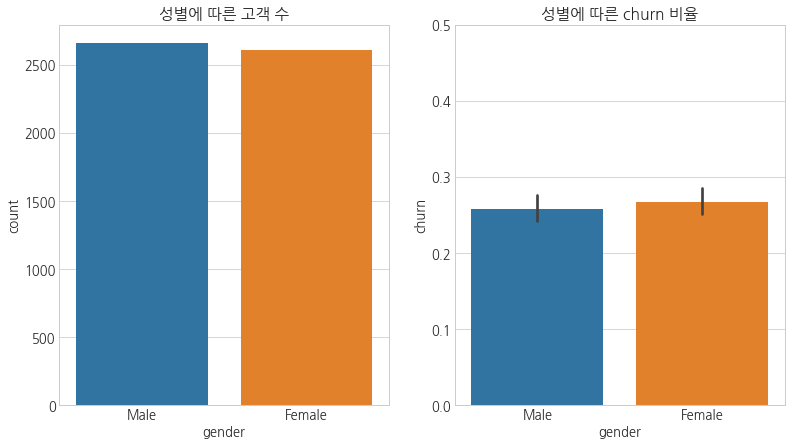

In [437]:
df_male = df_train[df_train.gender=='Male']
df_female = df_train[df_train.gender=='Female']

f, ax = plt.subplots(1, 2, figsize=(13, 7))
sns.countplot(df_train.gender, ax=ax[0])
ax[0].set_title('성별에 따른 고객 수')
sns.barplot('gender', 'churn', data=df_train, ax=ax[1])
ax[1].set_title('성별에 따른 churn 비율')
ax[1].set_ylim(0, 0.5)
print('Male ratio: {:.2f}%, Female ratio: {:.2f}%'.format(len(df_male) / len(df_train)*100,
                                                          len(df_female) / len(df_train)*100))

* 데이터셋 내 성비는 밸런스가 잘 맞는다.
    * 성별에 따라 churn 비율의 차이는 또한 적다.

### 3.2 Demographic
* seniorcitizen, partner, dependents	

In [438]:
def cplot(data, col, ax):
    sns.countplot(data[col], ax=ax)
    ax.set_title('{} ({:.2f}%)'.format(col, data[col].mean()*100))

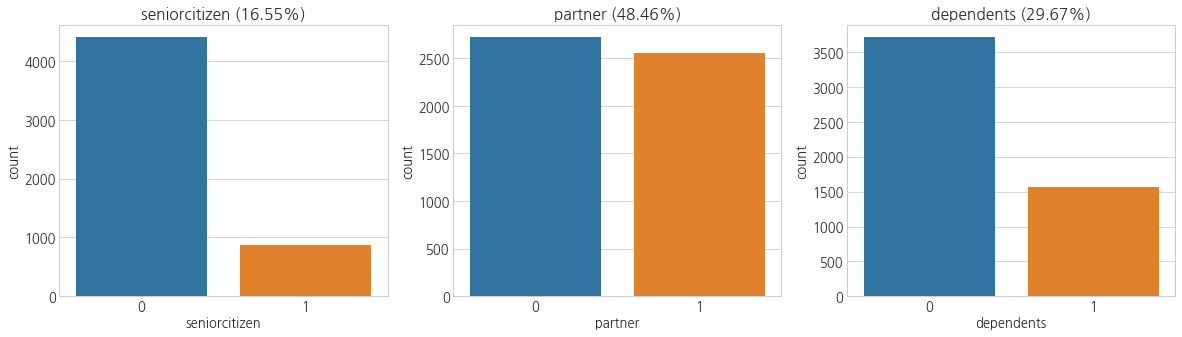

In [439]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
cplot(df_train, 'seniorcitizen', ax[0])
cplot(df_train, 'partner', ax[1])
cplot(df_train, 'dependents', ax[2])

* 시니어의 비율은 약 16%를 차지하고,
* 배우자가 있는 사람은 48%,
* 자식이 있는 곳은 30%를 차지한다.
* 이제 여기에 churn을 함께 살펴보자.

In [440]:
def churnplot(data, col, ax):
    sns.countplot(col, hue='churn', data=data, ax=ax)
    ax.set_title('{} (0: {:.2f}%, 1: {:.2f}%)'.format(
    col,
    data[data[col] == 0].churn.mean()*100, 
    data[data[col] == 1].churn.mean()*100))

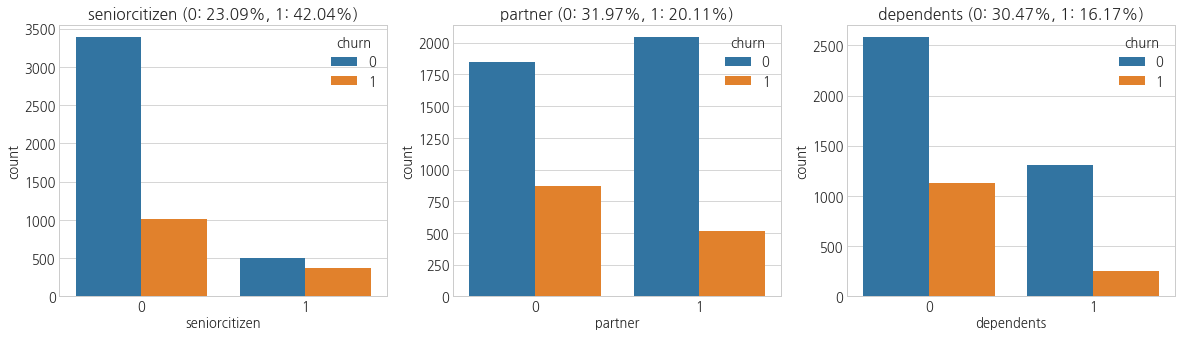

In [441]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
churnplot(df_train, 'seniorcitizen', ax[0])
churnplot(df_train, 'partner', ax[1])
churnplot(df_train, 'dependents', ax[2])

* 시니어일 경우, churn rate가 높다.
* 배우자나 자식이 있는 경우에는 churn rate가 상대적으로 낮다.

### 3.3 Tenure
* 계약 기간과 chunrate간의 관계를 파악해보자.

In [442]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6395,3058-HJCUY,Male,0,1,1,41,1,1,Fiber optic,0,0,1,1,1,1,One year,1,Electronic check,102.60,4213.35,1
5585,4667-OHGKG,Male,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,19.30,19.30,1
721,8434-VGEQQ,Male,0,1,1,61,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),20.55,1305.95,0
6525,2400-FEQME,Male,0,1,1,55,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.50,1177.95,0
1378,1697-BCSHV,Female,0,1,1,58,1,1,DSL,0,1,0,0,1,0,Month-to-month,1,Bank transfer (automatic),66.80,3970.40,0


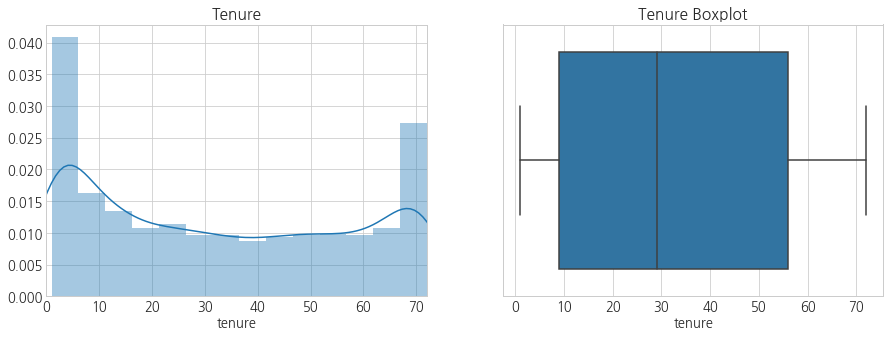

In [443]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_train.tenure, ax=ax[0])
ax[0].set_title('Tenure')
ax[0].set_xlim(0, max(df_train.tenure))

sns.boxplot(df_train.tenure, ax=ax[1])
ax[1].set_title('Tenure Boxplot')
plt.show()

* 쌍봉우리 형태를 보인다. 
* churn 유무로 나눠 살펴보자.

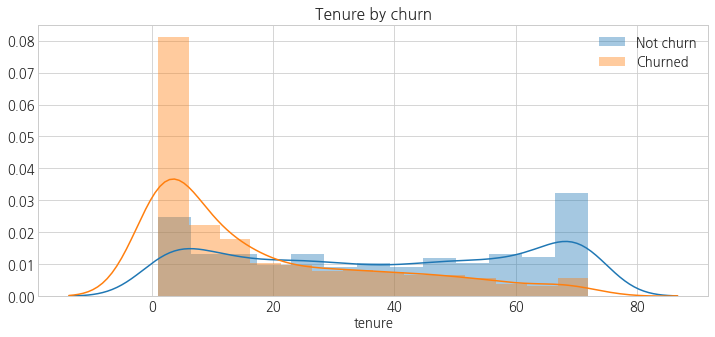

In [444]:
plt.figure(figsize=(12, 5))
sns.distplot(df_train[df_train.churn==0].tenure, label='Not churn')
sns.distplot(df_train[df_train.churn==1].tenure, label='Churned')
plt.legend()
plt.title('Tenure by churn')
plt.show()

* 이탈 고객의 경우 계약 기간이 짧은 것을 확인할 수 있다.

### 3.4 Services & contracts
* phoneservice, multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, paperlessbilling, contract(cat), internetservice(cat)

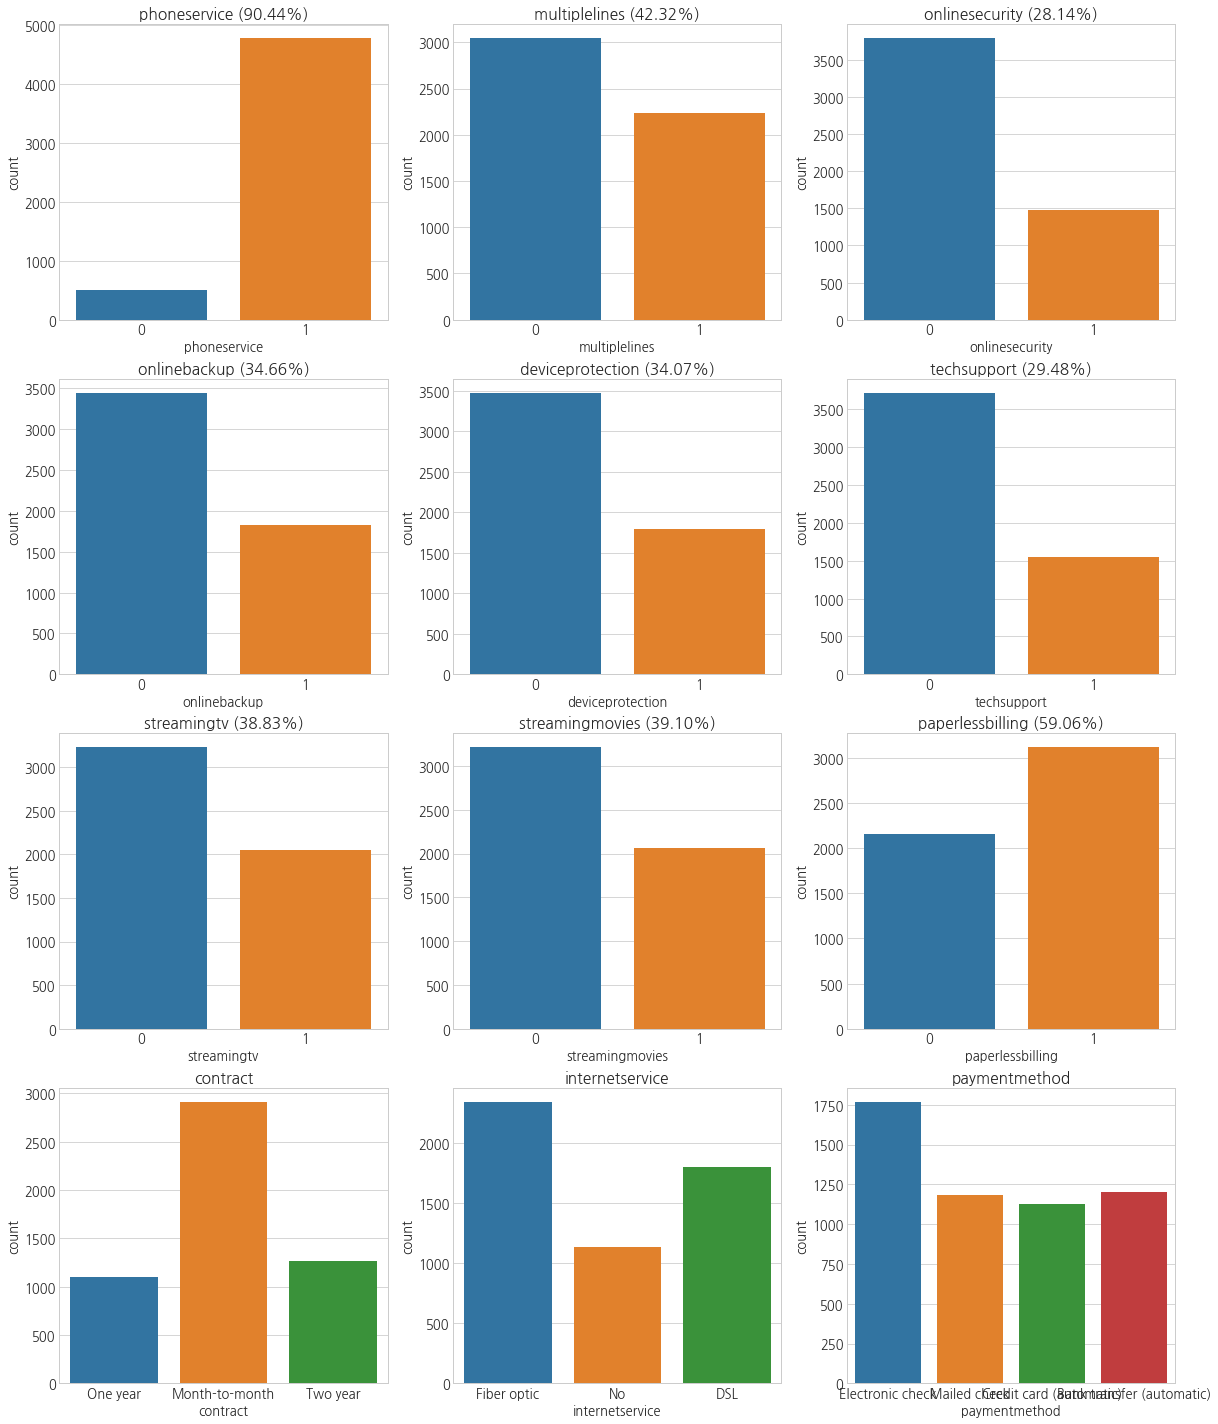

In [445]:
f, ax = plt.subplots(4, 3, figsize=(20, 25))
cplot(df_train, 'phoneservice', ax=ax[0,0])
cplot(df_train, 'multiplelines', ax=ax[0,1])
cplot(df_train, 'onlinesecurity', ax=ax[0,2])
cplot(df_train, 'onlinebackup', ax=ax[1,0])
cplot(df_train, 'deviceprotection', ax=ax[1,1])
cplot(df_train, 'techsupport', ax=ax[1,2])
cplot(df_train, 'streamingtv', ax=ax[2,0])
cplot(df_train, 'streamingmovies', ax=ax[2,1])
cplot(df_train, 'paperlessbilling', ax=ax[2,2])
sns.countplot('contract', data=df_train, ax=ax[3,0])
ax[3, 0].set_title('contract')
sns.countplot('internetservice', data=df_train, ax=ax[3,1])
ax[3, 1].set_title('internetservice')
sns.countplot('paymentmethod', data=df_train, ax=ax[3,2])
ax[3, 2].set_title('paymentmethod')

plt.show()

* 폰서비스를 사용하는 고객이 90% 이상이고, 그 외 서비스를 이용하는 고객들의 현황을 확인할 수 있다.
* 계약은 월별로 하는 고객이 가장 많았다.

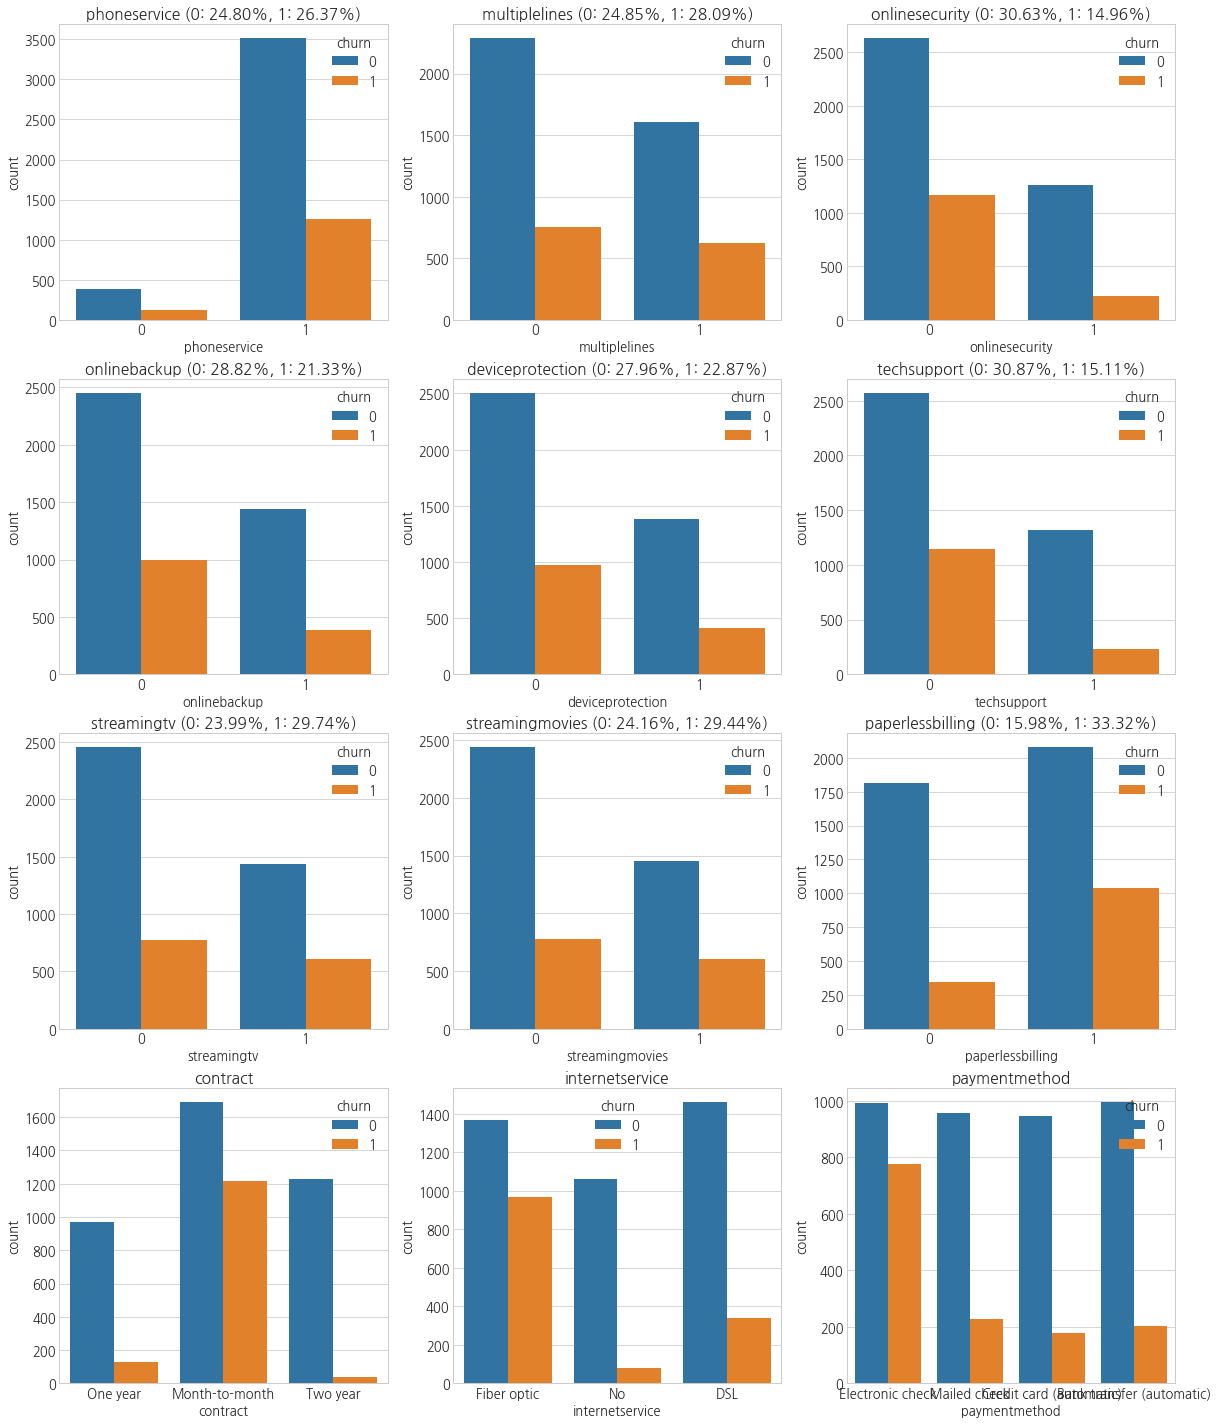

In [446]:
f, ax = plt.subplots(4, 3, figsize=(20, 25))
churnplot(df_train, 'phoneservice', ax=ax[0,0])
churnplot(df_train, 'multiplelines', ax=ax[0,1])
churnplot(df_train, 'onlinesecurity', ax=ax[0,2])
churnplot(df_train, 'onlinebackup', ax=ax[1,0])
churnplot(df_train, 'deviceprotection', ax=ax[1,1])
churnplot(df_train, 'techsupport', ax=ax[1,2])
churnplot(df_train, 'streamingtv', ax=ax[2,0])
churnplot(df_train, 'streamingmovies', ax=ax[2,1])
churnplot(df_train, 'paperlessbilling', ax=ax[2,2])
sns.countplot('contract', hue='churn', data=df_train, ax=ax[3,0])
ax[3, 0].set_title('contract')
sns.countplot('internetservice', hue='churn', data=df_train, ax=ax[3,1])
ax[3, 1].set_title('internetservice')
sns.countplot('paymentmethod', hue='churn', data=df_train, ax=ax[3,2])
ax[3, 2].set_title('paymentmethod')
plt.show()

* 특이한 점은, 통지서 없이 이용하는 고객의 churnrate가 높았다.
* 그리고 월별 계약자가 가장 많았는데, churnrate 또한 세 지불 형태 중 가장 높았다.
* paperlessbilling의 평균 차가 실제로 유의미한것인지 궁금한데, ttest를 통해 검증해보자.


In [447]:
from scipy import stats
lresult = stats.levene(df_train[df_train.paperlessbilling==0].churn, 
                       df_train[df_train.paperlessbilling==1].churn)
print('F: {:.3f}\np-value: {:.3f}'.format(lresult[0], lresult[1]))

F: 205.917
p-value: 0.000


* p값이 0.00미만으로 등분산성을 만족하지 않는다.

In [448]:
tresult = stats.ttest_ind(df_train[df_train.paperlessbilling == 0].churn,
                          df_train[df_train.paperlessbilling == 1].churn,
                          equal_var=False)
print('t: {:.3f}\np-value: {:.3f}'.format(tresult[0], tresult[1]))

t: -15.006
p-value: 0.000


* 두 평균 사이에 유의미한 차이가 있다는 것을 알 수 있다.

### 3.5 Charges
* monthlycharges, totalcharges
* 비용의 분포를 살펴보고,
* churn에 따른 비용 변화와
* 계약을 한 지 오래됐을수록 비용이 어떻게 변화하는지 함께 살펴보자.

In [449]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6395,3058-HJCUY,Male,0,1,1,41,1,1,Fiber optic,0,0,1,1,1,1,One year,1,Electronic check,102.60,4213.35,1
5585,4667-OHGKG,Male,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,19.30,19.30,1
721,8434-VGEQQ,Male,0,1,1,61,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),20.55,1305.95,0
6525,2400-FEQME,Male,0,1,1,55,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.50,1177.95,0
1378,1697-BCSHV,Female,0,1,1,58,1,1,DSL,0,1,0,0,1,0,Month-to-month,1,Bank transfer (automatic),66.80,3970.40,0


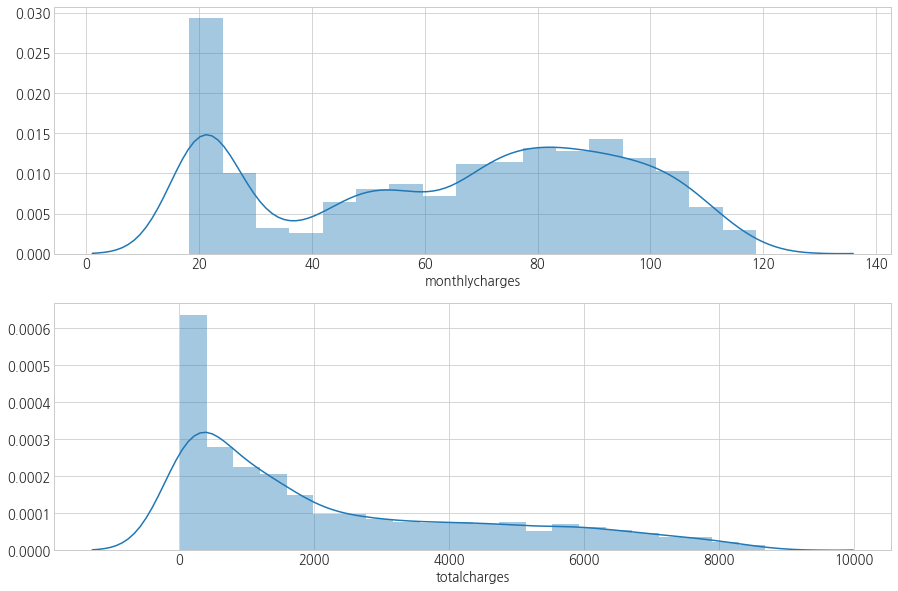

In [450]:
f, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.distplot(df_train.monthlycharges, ax=ax[0])
sns.distplot(df_train.totalcharges, ax=ax[1])
plt.show()

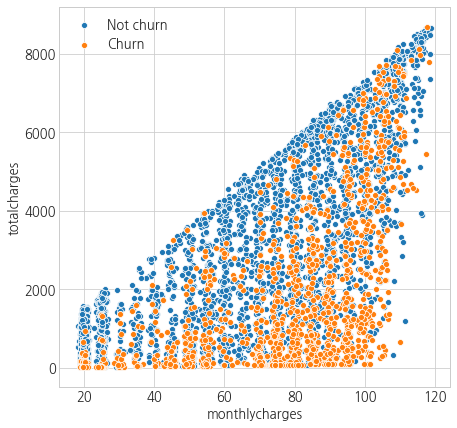

In [451]:
plt.figure(figsize=(7, 7))
sns.scatterplot(df_train[df_train.churn == 0].monthlycharges,
                df_train[df_train.churn == 0].totalcharges,
                label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].monthlycharges,
                df_train[df_train.churn == 1].totalcharges,
                label='Churn')
plt.show()

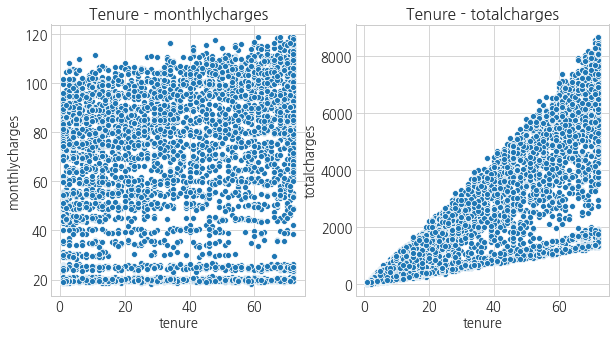

In [452]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(df_train.tenure, df_train.monthlycharges, ax=ax[0])
ax[0].set_title('Tenure - monthlycharges')
sns.scatterplot(df_train.tenure, df_train.totalcharges, ax=ax[1])
ax[1].set_title('Tenure - totalcharges')
plt.show()

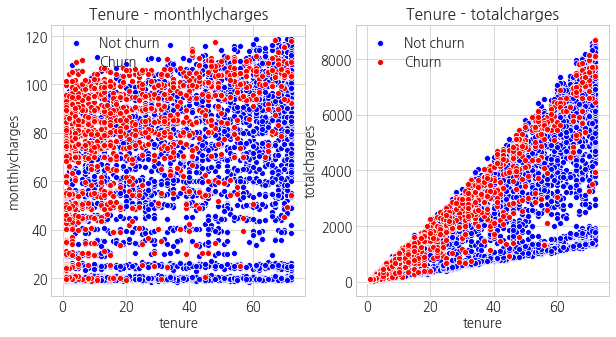

In [453]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(df_train[df_train.churn == 0].tenure,
                df_train[df_train.churn == 0].monthlycharges, ax=ax[0],
                color='b', label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].tenure,
                df_train[df_train.churn == 1].monthlycharges, ax=ax[0],
                color='r', label='Churn')
ax[0].set_title('Tenure - monthlycharges')
sns.scatterplot(df_train[df_train.churn == 0].tenure,
                df_train[df_train.churn == 0].totalcharges, ax=ax[1],
                color='b', label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].tenure,
                df_train[df_train.churn == 1].totalcharges, ax=ax[1],
                color='r', label='Churn')
ax[1].set_title('Tenure - totalcharges')
plt.show()

* 계약 기간이 길 수록 전체 요금은 증가한다. 당연한 결과다.
* 근데, 계약 기간이 길면 각종 혜택으로 인해 월 비용이 적을 줄 알았는데, 딱히 선형관계를 보이고있지는 않다.

In [454]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6395,3058-HJCUY,Male,0,1,1,41,1,1,Fiber optic,0,0,1,1,1,1,One year,1,Electronic check,102.60,4213.35,1
5585,4667-OHGKG,Male,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,19.30,19.30,1
721,8434-VGEQQ,Male,0,1,1,61,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),20.55,1305.95,0
6525,2400-FEQME,Male,0,1,1,55,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.50,1177.95,0
1378,1697-BCSHV,Female,0,1,1,58,1,1,DSL,0,1,0,0,1,0,Month-to-month,1,Bank transfer (automatic),66.80,3970.40,0


### 3.6 Correlation
* 각 컬럼간 상관 관계를 살펴보자.

In [455]:
df_train.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6395,3058-HJCUY,Male,0,1,1,41,1,1,Fiber optic,0,0,1,1,1,1,One year,1,Electronic check,102.6,4213.35,1
5585,4667-OHGKG,Male,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,19.3,19.30,1


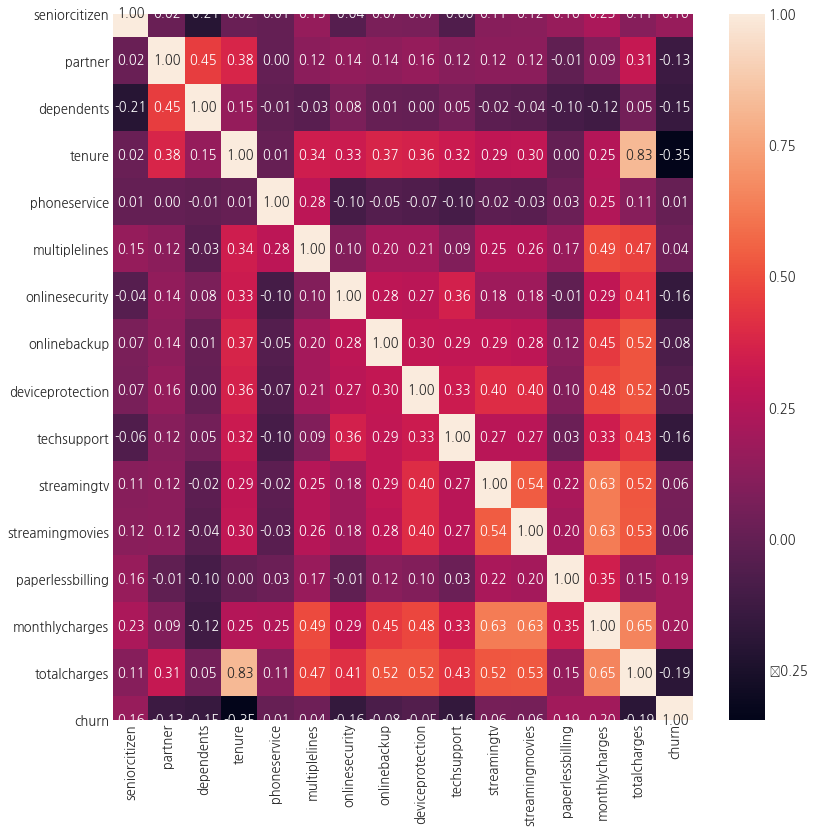

In [456]:
plt.figure(figsize=(13, 13))
sns.heatmap(df_train.corr(), annot=True, fmt='.2f')
plt.show()

## 4. Feature Engineering
* 일단 totalcharges와 monthlycharges, tenure를 스케일링해주자.
* 또한, 데이터에 비해 피처가 많다.
    * PCA를 통해 차원을 축소시켜보자.
* 그 후 범주형 데이터를 원핫인코딩하자.

In [457]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['tenure', 'monthlycharges', 'totalcharges']] =\
scaler.fit_transform(df_train[['tenure', 'monthlycharges', 'totalcharges']])

In [458]:
df_test[['tenure', 'monthlycharges', 'totalcharges']] =\
scaler.fit_transform(df_test[['tenure', 'monthlycharges', 'totalcharges']])

In [459]:
df_train.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6395,3058-HJCUY,Male,0,1,1,0.337227,1,1,Fiber optic,0,0,1,1,1,1,One year,1,Electronic check,1.249616,0.834995,1
5585,4667-OHGKG,Male,0,0,0,-1.288749,1,0,No,0,0,0,0,0,0,Month-to-month,1,Mailed check,-1.518250,-1.006553,1
721,8434-VGEQQ,Male,0,1,1,1.150214,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),-1.476716,-0.441603,0


In [464]:
df_train_dummy = pd.get_dummies(df_train.drop(['customerid'], axis=1))
df_test_dummy = pd.get_dummies(df_test.drop(['customerid'], axis=1))

In [465]:
df_train_dummy.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
6395,0,1,1,0.337227,1,1,0,0,1,1,1,1,1,1.249616,0.834995,1,0,1,0,1,0,0,1,0,0,0,1,0
5585,0,0,0,-1.288749,1,0,0,0,0,0,0,0,1,-1.518250,-1.006553,1,0,1,0,0,1,1,0,0,0,0,0,1
721,0,1,1,1.150214,1,0,0,0,0,0,0,0,0,-1.476716,-0.441603,0,0,1,0,0,1,0,0,1,0,1,0,0
6525,0,1,1,0.906318,1,0,0,0,0,0,0,0,0,-1.478377,-0.497806,0,0,1,0,0,1,0,0,1,0,0,0,1
1378,0,1,1,1.028266,1,1,0,1,0,0,1,0,1,0.060065,0.728319,0,1,0,1,0,0,1,0,0,1,0,0,0


In [467]:
X_train = df_train_dummy.drop(['churn'], axis=1)
y_train = df_train_dummy.churn

X_test = df_test_dummy.drop(['churn'], axis=1)
y_test = df_test_dummy.churn

In [469]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [470]:
pca

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)